In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def rmse_error(y_pred,y_test):
    mse_error=mean_squared_error(y_pred,y_test)
    return np.sqrt(mse_error)


In [2]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


# Read and preprocess data

In [3]:
sensing = pd.read_csv('sensing.csv',sep=';')
sensing

,SensingID,DeviceID,PlotID,SoilMoisture,Humidity,SoilTemperature,AirTemperature,Light,TimeStamp
0,4848,50586124812289,1,0.275984,32.8,24.3,17.27,3360,2019-12-04 09:27:27
1,4863,50586124812289,1,7.691960,31.4,26.1,18.85,3421,2019-12-04 09:35:21
2,4864,50586124812289,1,5.764660,30.3,26.2,21.25,3400,2019-12-04 09:35:41
3,4904,50586124812289,1,42.971100,25.7,27.1,26.70,4232,2019-12-04 09:49:21
4,4905,50586124812289,1,35.485000,25.9,27.2,26.94,4580,2019-12-04 09:49:40
...,...,...,...,...,...,...,...,...,...
82302,88430,50586124812289,1,28.712600,78.3,26.5,24.39,76,2020-01-03 17:08:52
82303,88431,50586124812289,1,28.711800,78.6,23.7,24.38,75,2020-01-03 17:09:13
82304,88432,50586124812289,1,28.711800,78.8,26.7,24.38,73,2020-01-03 17:09:33
82305,88433,50586124812289,1,28.711100,79.1,26.5,24.37,70,2020-01-03 17:09:53


In [4]:
sensing = sensing.drop(['SensingID','DeviceID','PlotID'],axis=1)

In [5]:
sensingList = [sensing.loc[i] for i in range(len(sensing)) if(i%60==0)]
sensingDF=pd.DataFrame(sensingList,index=range(len(sensingList)))
sensingDF

,SoilMoisture,Humidity,SoilTemperature,AirTemperature,Light,TimeStamp
0,0.275984,32.8,24.3,17.27,3360,2019-12-04 09:27:27
1,16.468100,25.6,26.3,19.55,28602,2019-12-04 10:09:00
2,39.008000,30.5,24.0,18.76,1188,2019-12-05 12:30:17
3,39.174100,29.6,24.0,18.75,1128,2019-12-05 12:50:57
4,41.108700,28.4,25.9,18.82,1102,2019-12-05 13:11:18
...,...,...,...,...,...,...
1367,34.552300,71.1,25.2,24.77,562,2020-01-03 15:33:13
1368,33.922400,69.6,27.4,24.75,623,2020-01-03 15:53:33
1369,32.553200,72.9,27.1,24.68,416,2020-01-03 16:13:53
1370,30.713700,74.2,26.9,24.56,206,2020-01-03 16:34:13


In [6]:
import time
for i in range(len(sensingDF)):
    sensingDF.TimeStamp[i] = time.strptime(sensingDF.TimeStamp[i], "%Y-%m-%d %H:%M:%S")
    sensingDF.TimeStamp[i] = time.mktime(sensingDF.TimeStamp[i])

/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/caothang/Documents/ky8/learnML/learnML/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
temp = [(sensingDF.SoilMoisture[i+1]-sensingDF.SoilMoisture[i]) for i in range(len(sensingDF)-1)]
temp.append(0)
sensingDF.insert(0, 'dSoilMoisture',temp)

In [8]:
sensingDF

scaler = MinMaxScaler()

In [9]:
# normalSensing = scaler.fit_transform(sensingDF)
# normalSensingDF = pd.DataFrame(normalSensing, columns=sensingDF.columns)
# normalSensingDF

In [10]:
Eva = [sensingDF.loc[i] for i in range(len(sensingDF)) if sensingDF.dSoilMoisture[i]<0]

In [11]:
dfEva=pd.DataFrame(Eva,index=range(len(Eva)))

In [12]:
with pd.ExcelWriter('dfEva.xlsx') as writer:
    dfEva.to_excel(writer)

In [13]:
dfEva

,dSoilMoisture,SoilMoisture,Humidity,SoilTemperature,AirTemperature,Light,TimeStamp
0,-1.1210,47.6698,26.8,25.5,19.26,740,1.575535e+09
1,-0.1969,46.5488,27.6,25.5,19.28,608,1.575536e+09
2,-2.6629,46.5373,30.6,24.5,19.46,344,1.575538e+09
3,-3.4028,43.8744,33.8,23.8,19.42,194,1.575540e+09
4,-2.9186,40.4716,34.7,23.5,19.37,26,1.575541e+09
...,...,...,...,...,...,...,...
734,-1.0427,35.5950,71.7,27.7,24.82,825,1.578039e+09
735,-0.6299,34.5523,71.1,25.2,24.77,562,1.578040e+09
736,-1.3692,33.9224,69.6,27.4,24.75,623,1.578042e+09
737,-1.8395,32.5532,72.9,27.1,24.68,416,1.578043e+09


In [114]:
# from sklearn import preprocessing
# normalEva = preprocessing.normalize(dfEva,axis=0)
feature = ['SoilMoisture','Humidiy','AirTemperature','Light']
normalEva = MinMaxScaler(dfEva[feature])

# dfNormalEva = pd.DataFrame(normalEva,columns=dfEva.columns)
# dfNormalEva
dfNormalEva = dfEva

(array([  5.,   3.,   1.,   3.,   7.,   7.,  18.,  32., 115., 548.]),
 array([-1.2856400e+01, -1.1570792e+01, -1.0285184e+01, -8.9995760e+00,
        -7.7139680e+00, -6.4283600e+00, -5.1427520e+00, -3.8571440e+00,
        -2.5715360e+00, -1.2859280e+00, -3.2000000e-04]),
 <a list of 10 Patch objects>)

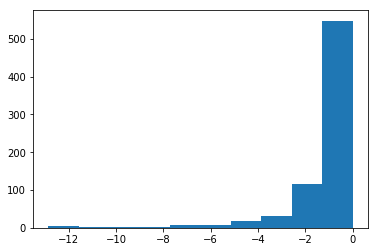

In [115]:
plt.hist(dfNormalEva.dSoilMoisture)

In [124]:
x_data = [[dfNormalEva.SoilMoisture[i],dfNormalEva.Humidity[i],dfNormalEva.AirTemperature[i],dfNormalEva.Light[i]] for i in range(len(dfNormalEva))]
x_data
y_data = [dfNormalEva.dSoilMoisture[i]*-1 for i in range(len(dfNormalEva))]
y_data


[1.1210000000000022,
 0.1968999999999994,
 2.6629000000000005,
 3.402799999999999,
 2.918599999999998,
 2.7191000000000045,
 2.0660000000000025,
 1.8748999999999967,
 1.5042000000000009,
 1.0977999999999994,
 1.780899999999999,
 1.9694000000000003,
 1.4033000000000015,
 1.235199999999999,
 1.316600000000001,
 1.4330999999999996,
 1.4065000000000012,
 1.2247999999999983,
 1.0455000000000005,
 0.6759000000000004,
 0.5278999999999989,
 0.565900000000001,
 0.41690000000000005,
 0.45479999999999876,
 0.38090000000000046,
 0.3816000000000006,
 0.3056000000000001,
 0.37959999999999994,
 0.2301000000000002,
 0.15409999999999968,
 0.07760000000000034,
 0.0032999999999994145,
 0.0024999999999995026,
 0.001300000000000523,
 0.0007999999999999119,
 0.07709999999999972,
 0.07629999999999981,
 0.15219999999999878,
 1.8517000000000081,
 5.899099999999997,
 7.801299999999998,
 5.279399999999995,
 7.000700000000002,
 4.170200000000001,
 2.462200000000003,
 0.8042999999999978,
 0.491100000000003,
 4.489

In [126]:
max_Y_data = max(y_data)
max_Y_data
y_data = y_data/max_Y_data
y_data

array([8.71939268e-02, 1.53153293e-02, 2.07126412e-01, 2.64677515e-01,
       2.27015339e-01, 2.11497775e-01, 1.60698174e-01, 1.45833982e-01,
       1.17000093e-01, 8.53893781e-02, 1.38522448e-01, 1.53184406e-01,
       1.09151862e-01, 9.60766622e-02, 1.02408139e-01, 1.11469774e-01,
       1.09400765e-01, 9.52677266e-02, 8.13213652e-02, 5.25730376e-02,
       4.10612613e-02, 4.40169876e-02, 3.24274291e-02, 3.53753772e-02,
       2.96272674e-02, 2.96817149e-02, 2.37702623e-02, 2.95261504e-02,
       1.78977008e-02, 1.19862481e-02, 6.03590430e-03, 2.56681497e-04,
       1.94455680e-04, 1.01116953e-04, 6.22258175e-05, 5.99701316e-03,
       5.93478734e-03, 1.18384618e-02, 1.44029433e-01, 4.58845400e-01,
       6.06802837e-01, 4.10643726e-01, 5.44530351e-01, 3.24367630e-01,
       1.91515510e-01, 6.25602813e-02, 3.81988737e-02, 3.49172397e-01,
       2.82162969e-01, 2.26828661e-01, 2.24456302e-01, 1.99604866e-01,
       1.68017485e-01, 1.47024050e-01, 1.31086463e-01, 1.11952024e-01,
      

(array([548., 115.,  32.,  18.,   7.,   7.,   3.,   1.,   3.,   5.]),
 array([2.48903270e-05, 1.00022401e-01, 2.00019912e-01, 3.00017423e-01,
        4.00014934e-01, 5.00012445e-01, 6.00009956e-01, 7.00007467e-01,
        8.00004978e-01, 9.00002489e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

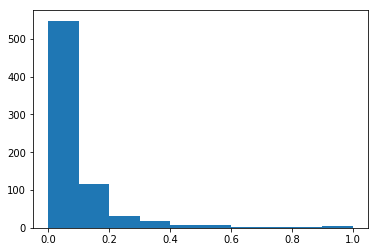

In [127]:
# y_data_temp=([y_data[i]*100 for i in range(len(y_data))])
plt.hist(y_data,bins=10)

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size =  0.2, random_state = 42)

In [133]:
x_train

[[22.3922, 62.1, 25.55, 1732],
 [2.15319, 67.9, 24.21, 191],
 [28.4725, 99.9, 16.9, 0],
 [64.3577, 33.4, 18.55, 2325],
 [22.994, 23.5, 18.68, 826],
 [11.3866, 42.0, 16.28, 0],
 [9.54111, 53.9, 19.32, 0],
 [21.6431, 75.9, 24.18, 0],
 [23.9086, 59.4, 25.77, 1489],
 [52.7418, 35.3, 18.07, 2022],
 [22.4927, 25.2, 18.71, 665],
 [34.8339, 37.6, 19.26, 0],
 [25.7082, 40.7, 19.57, 1484],
 [9.202580000000001, 53.2, 16.39, 0],
 [28.7734, 65.3, 17.6, 970],
 [7.158189999999999, 61.0, 16.71, 0],
 [26.5761, 18.5, 17.86, 1026],
 [36.736, 42.8, 18.24, 1956],
 [7.61648, 52.5, 16.71, 0],
 [8.858410000000001, 73.6, 14.26, 589],
 [17.3388, 93.1, 24.02, 1699],
 [24.2156, 99.9, 22.83, 0],
 [33.4814, 77.4, 24.12, 784],
 [52.1577, 25.7, 18.12, 1575],
 [13.4016, 37.0, 17.78, 0],
 [18.0574, 88.6, 24.21, 1060],
 [16.71, 39.1, 17.82, 0],
 [10.7324, 43.6, 18.72, 1],
 [28.3946, 99.9, 16.81, 0],
 [30.9812, 99.9, 21.46, 0],
 [42.8648, 87.7, 22.14, 597],
 [12.8343, 42.5, 16.84, 0],
 [5.9197, 95.4, 23.98, 0],
 [9.03888

# Create model and train

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD


Epoch 1/1000
591/591 [==============================] - 3s 4ms/step - loss: 0.7083
Epoch 2/1000
591/591 [==============================] - 0s 6us/step - loss: 0.7007
Epoch 3/1000
591/591 [==============================] - 0s 8us/step - loss: 0.6942
Epoch 4/1000
591/591 [==============================] - 0s 6us/step - loss: 0.6870
Epoch 5/1000
591/591 [==============================] - 0s 7us/step - loss: 0.6793
Epoch 6/1000
591/591 [==============================] - 0s 8us/step - loss: 0.6717
Epoch 7/1000
591/591 [==============================] - 0s 7us/step - loss: 0.6642
Epoch 8/1000
591/591 [==============================] - 0s 10us/step - loss: 0.6567
Epoch 9/1000
591/591 [==============================] - 0s 7us/step - loss: 0.6488
Epoch 10/1000
591/591 [==============================] - 0s 9us/step - loss: 0.6406
Epoch 11/1000
591/591 [==============================] - 0s 10us/step - loss: 0.6324
Epoch 12/1000
591/591 [==============================] - 0s 8us/step - loss: 0.6240

591/591 [==============================] - 0s 9us/step - loss: 0.1144
Epoch 99/1000
591/591 [==============================] - 0s 9us/step - loss: 0.1131
Epoch 100/1000
591/591 [==============================] - 0s 8us/step - loss: 0.1119
Epoch 101/1000
591/591 [==============================] - 0s 10us/step - loss: 0.1106
Epoch 102/1000
591/591 [==============================] - 0s 10us/step - loss: 0.1094
Epoch 103/1000
591/591 [==============================] - 0s 12us/step - loss: 0.1081
Epoch 104/1000
591/591 [==============================] - 0s 15us/step - loss: 0.1067
Epoch 105/1000
591/591 [==============================] - 0s 10us/step - loss: 0.1053
Epoch 106/1000
591/591 [==============================] - 0s 8us/step - loss: 0.1039
Epoch 107/1000
591/591 [==============================] - 0s 13us/step - loss: 0.1025
Epoch 108/1000
591/591 [==============================] - 0s 14us/step - loss: 0.1012
Epoch 109/1000
591/591 [==============================] - 0s 9us/step - lo

Epoch 194/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0354
Epoch 195/1000
591/591 [==============================] - 0s 16us/step - loss: 0.0352
Epoch 196/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0350
Epoch 197/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0348
Epoch 198/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0346
Epoch 199/1000
591/591 [==============================] - 0s 16us/step - loss: 0.0344
Epoch 200/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0342
Epoch 201/1000
591/591 [==============================] - 0s 13us/step - loss: 0.0340
Epoch 202/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0338
Epoch 203/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0336
Epoch 204/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0335
Epoch 205/1000
591/591 [==============================] - 0s

Epoch 290/1000
591/591 [==============================] - 0s 6us/step - loss: 0.0195
Epoch 291/1000
591/591 [==============================] - 0s 7us/step - loss: 0.0195
Epoch 292/1000
591/591 [==============================] - 0s 15us/step - loss: 0.0195
Epoch 293/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0194
Epoch 294/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0194
Epoch 295/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0194
Epoch 296/1000
591/591 [==============================] - 0s 6us/step - loss: 0.0193
Epoch 297/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0193
Epoch 298/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0193
Epoch 299/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0193
Epoch 300/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0192
Epoch 301/1000
591/591 [==============================] - 

Epoch 386/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0178
Epoch 387/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0178
Epoch 388/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0178
Epoch 389/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0178
Epoch 390/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0177
Epoch 391/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0177
Epoch 392/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0177
Epoch 393/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0177
Epoch 394/1000
591/591 [==============================] - 0s 17us/step - loss: 0.0177
Epoch 395/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0177
Epoch 396/1000
591/591 [==============================] - 0s 7us/step - loss: 0.0177
Epoch 397/1000
591/591 [==============================] - 

Epoch 482/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0166
Epoch 483/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0166
Epoch 484/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0166
Epoch 485/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0166
Epoch 486/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0166
Epoch 487/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0165
Epoch 488/1000
591/591 [==============================] - 0s 15us/step - loss: 0.0165
Epoch 489/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0165
Epoch 490/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0165
Epoch 491/1000
591/591 [==============================] - 0s 47us/step - loss: 0.0165
Epoch 492/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0165
Epoch 493/1000
591/591 [==============================] - 0

Epoch 578/1000
591/591 [==============================] - 0s 13us/step - loss: 0.0157
Epoch 579/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0157
Epoch 580/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0157
Epoch 581/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0156
Epoch 582/1000
591/591 [==============================] - 0s 21us/step - loss: 0.0156
Epoch 583/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0156
Epoch 584/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0156
Epoch 585/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0156
Epoch 586/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0156
Epoch 587/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0156
Epoch 588/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0156
Epoch 589/1000
591/591 [==============================]

Epoch 674/1000
591/591 [==============================] - 0s 18us/step - loss: 0.0146
Epoch 675/1000
591/591 [==============================] - 0s 19us/step - loss: 0.0146
Epoch 676/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0145
Epoch 677/1000
591/591 [==============================] - 0s 13us/step - loss: 0.0145
Epoch 678/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0145
Epoch 679/1000
591/591 [==============================] - 0s 7us/step - loss: 0.0145
Epoch 680/1000
591/591 [==============================] - 0s 17us/step - loss: 0.0145
Epoch 681/1000
591/591 [==============================] - 0s 6us/step - loss: 0.0145
Epoch 682/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0145
Epoch 683/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0145
Epoch 684/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0145
Epoch 685/1000
591/591 [==============================] - 

Epoch 770/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0136
Epoch 771/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0136
Epoch 772/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0136
Epoch 773/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0136
Epoch 774/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0136
Epoch 775/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0136
Epoch 776/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0136
Epoch 777/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0136
Epoch 778/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0135
Epoch 779/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0135
Epoch 780/1000
591/591 [==============================] - 0s 14us/step - loss: 0.0135
Epoch 781/1000
591/591 [==============================] - 

Epoch 866/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0130
Epoch 867/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0130
Epoch 868/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0129
Epoch 869/1000
591/591 [==============================] - 0s 8us/step - loss: 0.0129
Epoch 870/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0129
Epoch 871/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0129
Epoch 872/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0129
Epoch 873/1000
591/591 [==============================] - 0s 18us/step - loss: 0.0129
Epoch 874/1000
591/591 [==============================] - 0s 10us/step - loss: 0.0129
Epoch 875/1000
591/591 [==============================] - 0s 17us/step - loss: 0.0129
Epoch 876/1000
591/591 [==============================] - 0s 7us/step - loss: 0.0129
Epoch 877/1000
591/591 [==============================] - 

Epoch 962/1000
591/591 [==============================] - 0s 15us/step - loss: 0.0124
Epoch 963/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0124
Epoch 964/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0124
Epoch 965/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0124
Epoch 966/1000
591/591 [==============================] - 0s 23us/step - loss: 0.0124
Epoch 967/1000
591/591 [==============================] - 0s 53us/step - loss: 0.0124
Epoch 968/1000
591/591 [==============================] - 0s 24us/step - loss: 0.0124
Epoch 969/1000
591/591 [==============================] - 0s 12us/step - loss: 0.0123
Epoch 970/1000
591/591 [==============================] - 0s 22us/step - loss: 0.0123
Epoch 971/1000
591/591 [==============================] - 0s 11us/step - loss: 0.0123
Epoch 972/1000
591/591 [==============================] - 0s 9us/step - loss: 0.0123
Epoch 973/1000
591/591 [==============================] 

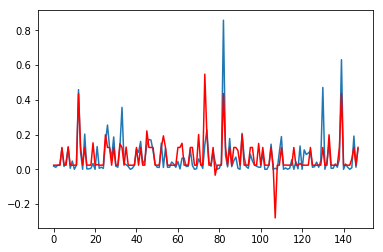

In [132]:
model = Sequential()
model.add(Dense(5,input_dim=4, activation='tanh'))
model.add(Dense(2,activation='tanh'))
# model.add(Dense(2,activation='tanh'))
# model.add(Dense(4,activation='sigmoid'))
model.add(Dense(1,activation='tanh'))
# adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
# adam = keras.optimizers.Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(optimizer='adam',loss='mse')

model.fit(np.array(x_train),np.array(y_train),epochs=1000, batch_size=len(x_train))

########################
result=(model.predict(np.array(x_test)))
score = model.evaluate(np.array(x_train),np.array(y_train), verbose=0)
# print('Test loss: %.4f'% score[0])
# print('Test accuracy %.4f'% score[1])
########################
plt.plot(y_test,'-',)
plt.plot(result,'r-')
plt.show()

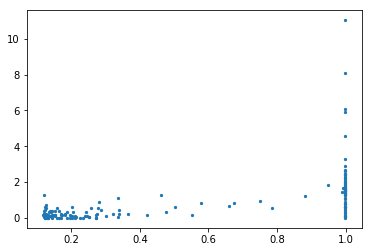

In [123]:
plt.scatter(result,y_test, s=5)
# plt.scatter(range(len(result)),result, s=10)
plt.show()

In [24]:
a=0
b=30418

# plt.plot(range(82307)[a*4320+b:a*4320+4320+b], sensing.SoilMoisture[a*4320+b:a*4320+4320+b])
# plt.plot(sensing.TimeStamp[a*4320+b:a*4320+4320+b], sensing.SoilMoisture[a*4320+b:a*4320+4320+b])
# plt.plot(sensing.TimeStamp[a*4320+b:a*4320+4320+b], sensing.AirTemperature[a*4320+b:a*4320+4320+b])
# plt.plot(sensing.TimeStamp[a*4320+b:a*4320+4320+b], sensing.Light[a*4320+b:a*4320+4320+b])
# plt.plot(range(82307), sensing.SoilMoisture)
# plt.plot(range(82307),sensing.TimeStamp)